In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import struct
from matplotlib import pyplot


# for evaluation metrics
from sklearn.metrics import accuracy_score, f1_score


# set random seed
np.random.seed(0)
random.seed(0)

This notebook impletents Adam for training neural networks. MNIST dataset is used.

The MNIST database contains the dataset for this problem. Develop an image recognition algorithm using logistic regression based on gradient descent that can correctly classify handwritten images as 4 or not 4

## Load dataset
MNIST data can be downloaded from  http://yann.lecun.com/exdb/mnist/.

The training set contains 60000 images
The shape of the image is (28, 28)
The label of the image is 3


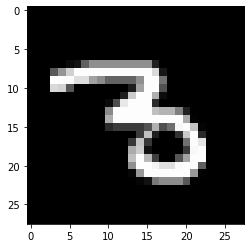

In [2]:
# load MNIST
path = '../MNIST/'   # the training set is stored in this directory

# Train data
fname_train_images = os.path.join(path, 'train-images-idx3-ubyte')  # the training set image file path
fname_train_labels = os.path.join(path, 'train-labels-idx1-ubyte')  # the training set label file path
    
# open the label file and load it to the "train_labels"
with open(fname_train_labels, 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    train_labels = np.fromfile(flbl, dtype=np.uint8)

# open the image file and load it to the "train_images"
with open(fname_train_images, 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    train_images = np.fromfile(fimg, dtype=np.uint8).reshape(len(train_labels), rows, cols)
    
print('The training set contains', len(train_images), 'images')  # print the how many images contained in the training set
print('The shape of the image is', train_images[0].shape)  # print the shape of the image


imgNumber = 30  # choose which image you want to display
print('The label of the image is', train_labels[imgNumber])  # print the label of the image displayed

pyplot.imshow(train_images[imgNumber], cmap='gray')  # plot the image in "gray" colormap
pyplot.show()

In [3]:
# load test set

fname_test_images = os.path.join(path, 't10k-images-idx3-ubyte')  # the training set image file path
fname_test_labels = os.path.join(path, 't10k-labels-idx1-ubyte 2')  # the training set label file path
    
# open the label file and load it to the "train_labels"
with open(fname_test_labels, 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    test_y = np.fromfile(flbl, dtype=np.uint8)

# open the image file and load it to the "train_images"
with open(fname_test_images, 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    test_X = np.fromfile(fimg, dtype=np.uint8).reshape(len(test_y), rows, cols)
    
print('The training set contains', len(test_X), 'images')  # print the how many images contained in the training set
print('The shape of the image is', test_X[0].shape)  # print the shape of the image

The training set contains 10000 images
The shape of the image is (28, 28)


## Preprocessing

Flatten. Typically, pictures are reshaped to column vectors. The images in the dataset are of size (28,28)
 and should be reshaped to column vectors of size (28x28,1).

In [4]:
train_X = np.reshape(train_images, (train_images.shape[0], -1))
train_X = train_X.T
# set y as boolean: 4 or not 4
train_y = train_labels == 4

# preprocess test set
test_X = np.reshape(test_X, (test_X.shape[0], -1))
test_X = test_X.T
test_X.shape
test_y = test_y == 4

print("training set shape:", train_X.shape, "; total number of traing samples:", len(train_y))
print("total number of traing samples:", len(test_y))

training set shape: (784, 60000) ; total number of traing samples: 60000
total number of traing samples: 10000


For scaling of picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

In [5]:
train_X = train_X / 255
test_X = test_X / 255

## Neural Network model

forward prop: 
$$ z^{[1]} = W^{[1]} X + b^{[1]} \\
a^{[1]} = g^{[1]}(z^{[1]}) \\$$
$$z^{[l]} = W^{[l]} a^{[1-1]} + b^{[l]} \\ 
a^{[l]} = g(z^{[l]}) $$
last layer:
$$A^{[L]} = sigma(z^{[L]}) = \frac{1}{1 + e^{-(W^{[L]} a^{[L-1]} + b^{[L]})}} $$
 where $g(\cdot)$ is non-linear activation function such as Relu( ) or tanh( ).
 
Loss function:
$$J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{[L](i)})+(1-y^{(i)})\log(1-a^{[L](i)})$$


In [13]:
# load neural net model
from importlib import reload
import model
reload(model)
import adam
reload(adam)

from model import deep_feedforward_network
from adam import AdamInitializer

## SGD with Adam

    • Train a 3-layer neural network to classify the data using minibatch SGD.
    • Use 2 hidden layers with 20 and 10 units respectively
    • Use ReLU in the hidden layers and sigmoid in the output layer.
    • Plot the learning curve (cost function vs. number of iterations).
    • Compute the training and test error.
    • Investigate the impact of the minibatch size.

In [25]:
def train(epoch, verbal = True):
    costs = np.zeros(n_iter)
    # permute the sample index
    shuffled_ind = np.random.permutation(len(train_y))
#     print("first 5 ind after shuffle, ", shuffled_ind[:5])
    batch_i = 0 # index of mini batch
    for batch_i in range(n_iter):
        # take account that the last batch might have samples less than batch size 
        end_ind = min(len(train_y) - 1, (batch_i + 1)*batch_size)
        train_Xs = train_X[:, shuffled_ind[batch_i*batch_size : end_ind]]
        train_ys = train_y[shuffled_ind[batch_i*batch_size : end_ind]]
        batch_cost = NN.fit(train_Xs, train_ys)
        costs[batch_i] = batch_cost

        if batch_i % 500 == 0 and verbal:        
            print("Epoch %i. Cost at iteration %i : %f" %(epoch, batch_i, batch_cost))

        batch_i += batch_size
    return costs

In [26]:
Adamopt = AdamInitializer(step_size = 0.001, pho1 = 0.9, pho2 = 0.999, eps = 1e-8)
NN = deep_feedforward_network(n0 = train_X.shape[0] ,hidden_list=[20, 10], drop_out= 0, l2_reg= 0, optimizerInit = Adamopt)


In [32]:
max_epoch = 30
batch_size = 64
n_iter = len(train_y) // batch_size + 1  # number of iteration for each epoch
all_costs = np.zeros((max_epoch, n_iter))

for epoch in range(max_epoch):
    if epoch % 10 == 0:
        verbal = True
    else:
        verbal = False
    all_costs[epoch] = train(epoch, verbal)

Epoch 0. Cost at iteration 0 : 0.000009
Epoch 0. Cost at iteration 500 : 0.359782
Epoch 10. Cost at iteration 0 : 0.000000
Epoch 10. Cost at iteration 500 : -0.000000
Epoch 20. Cost at iteration 0 : 0.000000
Epoch 20. Cost at iteration 500 : 0.079936


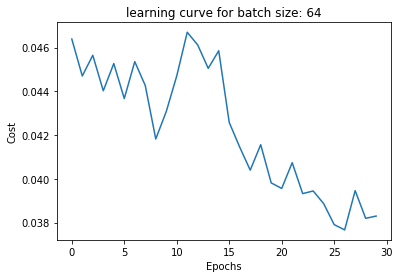

In [41]:
def plot_curve(all_cost, batch_size):
    all_cost = np.mean(all_costs, 1)
#     all_cost = all_cost.flatten()
    plt.plot(all_cost)
    plt.ylabel('Cost')
    plt.xlabel('Epochs')
    plt.title('learning curve for batch size: ' + str(batch_size))
    plt.show()

plot_curve(all_costs, batch_size)


We can see from the learning curve that the learning cost has many randomness but descents quickly. The randomness is caused by randomly sampled mini batches. Cost per mini batch is too chaotic to see anything so I ploted the average cost of every epoch.

In [34]:
NN.evaluate(train_X, train_y,test_X, test_y)

Training accuracy: 0.997   F1 score: 0.985
Testing accuracy: 0.992    F1 score: 0.961


The result shows that stochastic gradient descent works well. With only 30 epoch it is reaching high tesing accuracy.

### Infulence of size of minibatch size

Using mini batch size 64, training took 73.91 seconds
Training accuracy: 0.996   F1 score: 0.980
Testing accuracy: 0.993    F1 score: 0.963


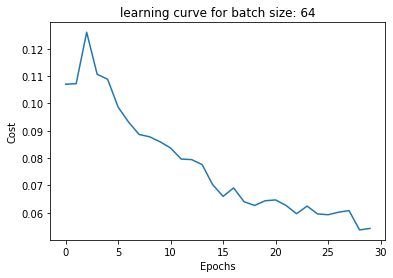

---------------
Using mini batch size 256, training took 33.33 seconds
Training accuracy: 0.993   F1 score: 0.963
Testing accuracy: 0.991    F1 score: 0.955


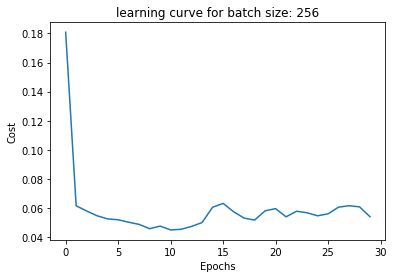

---------------
Using mini batch size 512, training took 26.22 seconds
Training accuracy: 0.995   F1 score: 0.974
Testing accuracy: 0.994    F1 score: 0.967


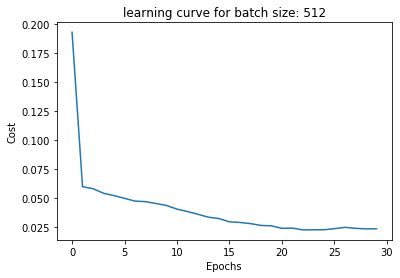

---------------


In [42]:
import time
for batch_size in [64, 256, 512]:
    # time the training process
    tic = time.clock()
    NN = deep_feedforward_network(n0 = train_X.shape[0] ,hidden_list=[20, 10], drop_out= 0, l2_reg= 0, optimizerInit = Adamopt)
    max_epoch = 30
    n_iter = len(train_y) // batch_size + 1  # number of iteration for each epoch
    all_costs = np.zeros((max_epoch, n_iter))
    
    for epoch in range(max_epoch):
        all_costs[epoch] = train(epoch, verbal = False)
        
    fitT = time.clock() - tic
    print("Using mini batch size %i, training took %.2f seconds" %(batch_size, fitT))
    # evaluate
    NN.evaluate(train_X, train_y,test_X, test_y)
    plot_curve(all_costs, batch_size)
    print('---------------')

We can see that as mini batch size increases, the variantion in the cost deceases. This is because for each iteration, more samples provide a more accurate estimation of the gradient, and the sample cost is more averaged out to be close to the true value. 

The outcome shows that for the same number of epoches, smaller batch size takes more time. This is because it takes mroe iterations within an epoch to loop though all examples. So that there will be more iterations for smaller batches. The accuracy score shows that a smaller mini batch size (64) works better than larger batch size. This is also possibly because more iterations are allowed to update parameter.



## Investigate the impact of the momentum hyper parameters

### Influece of update step size

Using step size = 0.0050, training took 107.15 seconds
Training accuracy: 0.997   F1 score: 0.984
Testing accuracy: 0.990    F1 score: 0.949


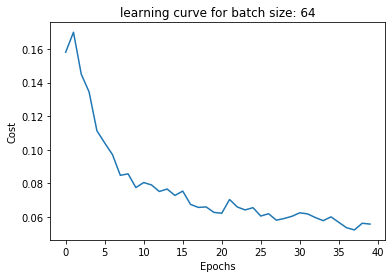

---------------
Using step size = 0.0010, training took 105.77 seconds
Training accuracy: 0.996   F1 score: 0.978
Testing accuracy: 0.992    F1 score: 0.958


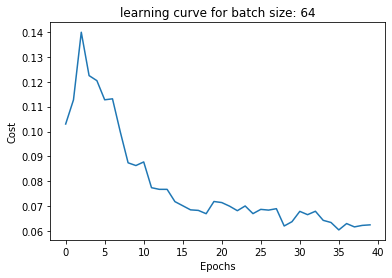

---------------
Using step size = 0.0005, training took 102.34 seconds
Training accuracy: 0.991   F1 score: 0.955
Testing accuracy: 0.990    F1 score: 0.948


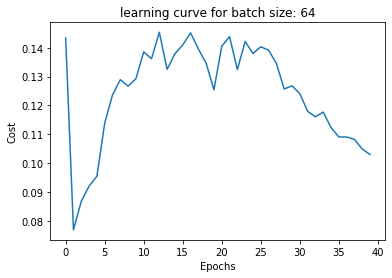

---------------


In [46]:
import time
for step_size in [ 0.005, 0.001, 0.0005]:
    # time the training process
    tic = time.clock()
    Adamopt = AdamInitializer(step_size = step_size, pho1 = 0.9, pho2 = 0.999, eps = 1e-8)
    NN = deep_feedforward_network(n0 = train_X.shape[0] ,hidden_list=[20, 10], drop_out= 0, l2_reg= 0, optimizerInit = Adamopt)

    batch_size = 64
    max_epoch = 40
    n_iter = len(train_y) // batch_size + 1  # number of iteration for each epoch
    all_costs = np.zeros((max_epoch, n_iter))
    
    for epoch in range(max_epoch):
        all_costs[epoch] = train(epoch, verbal = False)
        
    fitT = time.clock() - tic
    print("Using step size = %.4f, training took %.2f seconds" %(step_size, fitT))
    # evaluate
    NN.evaluate(train_X, train_y,test_X, test_y)
    plot_curve(all_costs, batch_size)
    print('---------------')

We can see that when step size is too large (learning rate = 0.005), the training decreases quickly but fail to arrive at a good minimal point. When step size is too small (0.0005), it converges too slowly. The best stepsize in this case is 0.001 as suggested. 

### Influece of exponential decay rate for first moment
Exponential decay rate for first moment decides how quick to discsard historic information on gradient descent directions. Smaller decay rate means quicker to forget about pass.

Using 1st order decay rate 0.90
Training accuracy: 0.995   F1 score: 0.972
Testing accuracy: 0.992    F1 score: 0.961


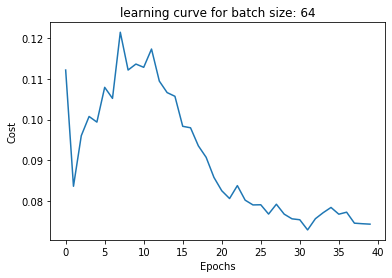

---------------
Using 1st order decay rate 0.60
Training accuracy: 0.997   F1 score: 0.984
Testing accuracy: 0.993    F1 score: 0.962


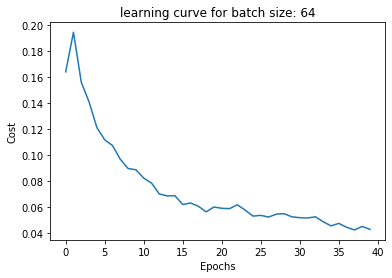

---------------
Using 1st order decay rate 0.30
Training accuracy: 0.994   F1 score: 0.966
Testing accuracy: 0.990    F1 score: 0.949


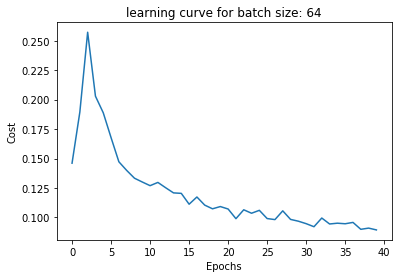

---------------


In [53]:
for pho1 in [ 0.9, 0.6, 0.3]:
    Adamopt = AdamInitializer(step_size = step_size, pho1 = pho1, pho2 = 0.999, eps = 1e-8)
    NN = deep_feedforward_network(n0 = train_X.shape[0] ,hidden_list=[20, 10], drop_out= 0, l2_reg= 0, optimizerInit = Adamopt)

    batch_size = 64
    max_epoch = 40
    n_iter = len(train_y) // batch_size + 1  # number of iteration for each epoch
    all_costs = np.zeros((max_epoch, n_iter))
    
    for epoch in range(max_epoch):
        all_costs[epoch] = train(epoch, verbal = False)
        
    print("Using 1st order decay rate %.2f" %(pho1))
    # evaluate
    NN.evaluate(train_X, train_y,test_X, test_y)
    plot_curve(all_costs, batch_size)
    print('---------------')

Form the result, when first order decay momentum is high (pho1 = 0.9), it cannot initially get a good estimate of the gradient, but learns better over time. When first order decay momentum is low it initially decays faster but cannot arrive at a good local optima. The best value in this case is pho1 = 0.6.

### Influece of exponential decay rate for second moment
Exponential decay rate for second moment decides how quick to discsard historic information on gradient descent magtitudes in each directions. Smaller decay rate means quicker to forget about past.

Using 1st order decay rate 0.60
Training accuracy: 0.995   F1 score: 0.972
Testing accuracy: 0.993    F1 score: 0.963


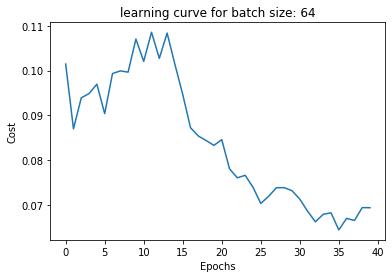

---------------
Using 1st order decay rate 0.60
Training accuracy: 0.984   F1 score: 0.917
Testing accuracy: 0.983    F1 score: 0.910


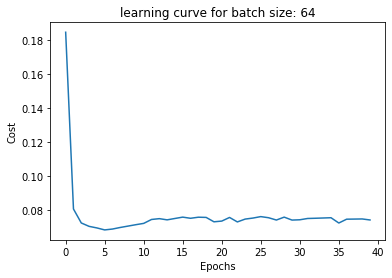

---------------
Using 1st order decay rate 0.60
Training accuracy: 0.983   F1 score: 0.907
Testing accuracy: 0.980    F1 score: 0.894


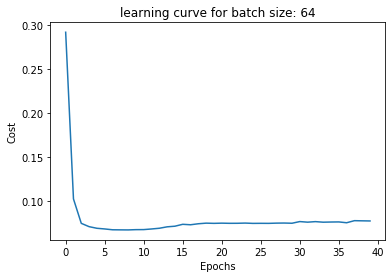

---------------


In [49]:
for pho2 in [ 0.999, 0.9, 0.6]:
    Adamopt = AdamInitializer(step_size = step_size, pho1 = 0.9, pho2 = pho2, eps = 1e-8)
    NN = deep_feedforward_network(n0 = train_X.shape[0] ,hidden_list=[20, 10], drop_out= 0, l2_reg= 0, optimizerInit = Adamopt)

    batch_size = 64
    max_epoch = 40
    n_iter = len(train_y) // batch_size + 1  # number of iteration for each epoch
    all_costs = np.zeros((max_epoch, n_iter))
    
    for epoch in range(max_epoch):
        all_costs[epoch] = train(epoch, verbal = False)
        
    print("Using 1st order decay rate %.2f" %(pho1))
    # evaluate
    NN.evaluate(train_X, train_y,test_X, test_y)
    plot_curve(all_costs, batch_size)
    print('---------------')

From the outcome, we can see that with higher second order momentum the model works better. The best value for pho2 is 0.999 as suggested.